In [3]:
#Script assumes that the NIH and Chexpert datasets have been downloaded into folders named nih_data and 
#chexpert_data respectively in the same directory as the one you are running this script from 


In [4]:
import os
import pandas as pd
from glob import glob

In [5]:
#folder containing nih data
nih_root = "nih_data"

#Find all images across the subfolders in the nih folder
nih_image_paths = glob(os.path.join(nih_root, "images_*", "images", "*.png"))
len(nih_image_paths)



112120

In [6]:
#read nih csv file into a dataframe
nih_df = pd.read_csv(os.path.join(nih_root, "Data_Entry_2017.csv"))
nih_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [7]:
#map images path to nih dataframe
nih_image_dict = {os.path.basename(path) : path for path in nih_image_paths}
nih_df["path"] = nih_df["Image Index"].map(nih_image_dict)
nih_df = nih_df.dropna(subset = ["path"]).reset_index(drop=True)
nih_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,nih_data/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,nih_data/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,nih_data/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,nih_data/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,nih_data/images_001/images/00000003_000.png


In [8]:
# read in the train and validation csv files for the Chexpert dataset from the folder where the dataset is saved
chexpert_root = "chexpert_data"
chex_train = pd.read_csv(os.path.join(chexpert_root, "train.csv"))
chex_valid = pd.read_csv(os.path.join(chexpert_root, "valid.csv"))
chex_df = pd.concat([chex_train, chex_valid], ignore_index = True)
chex_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [9]:
# convert Chexpert relative paths in csv files to absolute paths
chex_df["path"] = chex_df["Path"].apply(lambda p: os.path.join(chexpert_root, p))
chex_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,path
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,chexpert_data/CheXpert-v1.0-small/train/patien...
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,chexpert_data/CheXpert-v1.0-small/train/patien...
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,chexpert_data/CheXpert-v1.0-small/train/patien...
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,chexpert_data/CheXpert-v1.0-small/train/patien...
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,chexpert_data/CheXpert-v1.0-small/train/patien...


In [10]:
#Function to add Image Index to chexpert
def chexpert_imgidx(df,path_col,new_col = "Image Index"):
    df[new_col] = df[path_col].apply(lambda x: "/".join(x.split("/")[-3:]))
    return df

In [11]:
chexpert_imgidx(chex_df,path_col = "path", new_col = "Image Index")
chex_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,path,Image Index
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,chexpert_data/CheXpert-v1.0-small/train/patien...,patient00001/study1/view1_frontal.jpg
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,chexpert_data/CheXpert-v1.0-small/train/patien...,patient00002/study2/view1_frontal.jpg
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,chexpert_data/CheXpert-v1.0-small/train/patien...,patient00002/study1/view1_frontal.jpg
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,chexpert_data/CheXpert-v1.0-small/train/patien...,patient00002/study1/view2_lateral.jpg
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,chexpert_data/CheXpert-v1.0-small/train/patien...,patient00003/study1/view1_frontal.jpg


In [12]:
chex_df["Image Index"].nunique()

223648

In [13]:
# Select the class labels to use for both datasets. Class labels(target labels) based on the 14 classifications + No finding from NIH dataset
target_labels = [
    "No Finding",
    "Atelectasis",
    "Cardiomegaly",
    "Consolidation",
    "Edema",
    "Effusion",
    "Emphysema",
    "Fibrosis",
    "Hernia",
    "Infiltration",
    "Mass",
    "Nodule",
    "Pleural_Thickening",
    "Pneumonia",
    "Pneumothorax"
] 


In [14]:
#convert pipe seperated strings in NIH to binary columns
for label in target_labels:
    nih_df[label] = nih_df["Finding Labels"].str.contains(label).astype(int)

In [15]:
nih_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,1,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,1,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,0,1,0,0,0,0,0,0


In [16]:
#Process Chexpert Labels
#replace uncertain label with 1

#rename pleural effusion column to effusion to match NIH label
chex_df = chex_df.rename(columns = {"Pleural Effusion" : "Effusion"})

#remove diseases not in nih chest dataset
chex_col = chex_df.columns.tolist()
chex_selcol = ['Image Index',
 'Path',
 'Sex',
 'Age',
 'Frontal/Lateral',
 'AP/PA',
 'No Finding',
 'Cardiomegaly',
 'Edema',
 'Consolidation',
 'Pneumonia',
 'Atelectasis',
 'Pneumothorax',
 'Effusion',
 'path']
chex_dfupd = chex_df[chex_selcol]
#chex_dfupd.head()
chex_target = [
 'No Finding',
 'Cardiomegaly',
 'Edema',
 'Consolidation',
 'Pneumonia',
 'Atelectasis',
 'Pneumothorax',
 'Effusion'
 ]

#replace uncertain label with 1 and nan with 0
chex_dfupd[chex_target] = chex_dfupd[chex_target].fillna(0)
chex_dfupd[chex_target] = chex_dfupd[chex_target].replace(-1,1)

# address columns in nih dataset but not in chexpert
for col in target_labels:
    if col not in chex_dfupd.columns:
        chex_dfupd[col] = 0.0


chex_dfupd.head()

/tmp/ipykernel_4167969/1606152267.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chex_dfupd[chex_target] = chex_dfupd[chex_target].fillna(0)
/tmp/ipykernel_4167969/1606152267.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chex_dfupd[chex_target] = chex_dfupd[chex_target].replace(-1,1)
/tmp/ipykernel_4167969/1606152267.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Image Index,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Cardiomegaly,Edema,Consolidation,...,Pneumothorax,Effusion,path,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening
0,patient00001/study1/view1_frontal.jpg,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,...,0.0,0.0,chexpert_data/CheXpert-v1.0-small/train/patien...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,patient00002/study2/view1_frontal.jpg,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,1.0,1.0,1.0,...,0.0,1.0,chexpert_data/CheXpert-v1.0-small/train/patien...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,patient00002/study1/view1_frontal.jpg,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,...,0.0,0.0,chexpert_data/CheXpert-v1.0-small/train/patien...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,patient00002/study1/view2_lateral.jpg,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0.0,0.0,0.0,1.0,...,0.0,0.0,chexpert_data/CheXpert-v1.0-small/train/patien...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,patient00003/study1/view1_frontal.jpg,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,1.0,0.0,...,0.0,0.0,chexpert_data/CheXpert-v1.0-small/train/patien...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#update chexpert path to the right path
def chexpert_pathupd (df, col_name= "path"):
    def extract_root(path):
        parts_pth = path.split("/")
        if len(parts_pth) >2 and parts_pth[1] == "CheXpert-v1.0-small":
            splt = parts_pth[2]
            return f"chexpert_data/{splt}"
        return path
    df[col_name] = df[col_name].apply(extract_root)
    return df

In [18]:
chexpert_pathupd(chex_dfupd,col_name = "path")
chex_dfupd['path'].tail()

223643    chexpert_data/valid
223644    chexpert_data/valid
223645    chexpert_data/valid
223646    chexpert_data/valid
223647    chexpert_data/valid
Name: path, dtype: object

In [19]:
#check that you have the right paths
chex_dfupd["path"].unique()

array(['chexpert_data/train', 'chexpert_data/valid'], dtype=object)

In [20]:
#add dataset source to each dataset dataframe
nih_df["source"] = "NIH"
chex_dfupd["source"] = "CheXpert"

#keep only needed columns 
nih_clean = nih_df[["Image Index"]+ ["path"] + target_labels + ["source"]]
chex_clean = chex_dfupd[["Image Index"]+ ["path"] + target_labels + ["source"]]
nih_clean.tail()


,Image Index,path,No Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,source
112115,00030801_001.png,nih_data/images_012/images/00030801_001.png,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,NIH
112116,00030802_000.png,nih_data/images_012/images/00030802_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NIH
112117,00030803_000.png,nih_data/images_012/images/00030803_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NIH
112118,00030804_000.png,nih_data/images_012/images/00030804_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NIH
112119,00030805_000.png,nih_data/images_012/images/00030805_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NIH


In [21]:
#combine the two datasets
nih_chexcomb_df = pd.concat([nih_clean,chex_clean], ignore_index = True)

#shuffle combined dataset

nih_chexcomb_df = nih_chexcomb_df.sample(frac =1, random_state = 42).reset_index(drop = True)

nih_chexcomb_df.head()


,Image Index,path,No Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,source
0,00027334_005.png,nih_data/images_011/images/00027334_005.png,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NIH
1,patient31087/study1/view1_frontal.jpg,chexpert_data/train,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CheXpert
2,00027043_000.png,nih_data/images_011/images/00027043_000.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NIH
3,patient55457/study1/view1_frontal.jpg,chexpert_data/train,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,CheXpert
4,00003523_013.png,nih_data/images_002/images/00003523_013.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NIH


In [22]:
#Function to create Finding Labels in combined dataset
def create_finding_labels(df,disease_lab):
    df["Finding Labels"]= df[disease_lab].apply(lambda row: "|".join([x for x in disease_lab if row[x]== 1.0]), axis = 1)
    return df

In [23]:
nih_chexcomb_df_final = create_finding_labels(nih_chexcomb_df,target_labels)
nih_chexcomb_df_final.head()

,Image Index,path,No Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,source,Finding Labels
0,00027334_005.png,nih_data/images_011/images/00027334_005.png,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NIH,Atelectasis
1,patient31087/study1/view1_frontal.jpg,chexpert_data/train,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CheXpert,No Finding
2,00027043_000.png,nih_data/images_011/images/00027043_000.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NIH,No Finding
3,patient55457/study1/view1_frontal.jpg,chexpert_data/train,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,CheXpert,Atelectasis|Consolidation|Edema|Pneumonia
4,00003523_013.png,nih_data/images_002/images/00003523_013.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NIH,Infiltration|Pneumonia


In [24]:
#remove rows with no finding labels
import numpy as np
nih_chexcomb_df_final["Finding Labels"].replace("", np.nan, inplace = True)
nih_chexcomb_df_final.dropna(subset= ["Finding Labels"],inplace=True)


/tmp/ipykernel_4167969/3965809201.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nih_chexcomb_df_final["Finding Labels"].replace("", np.nan, inplace = True)


In [25]:
# save dataframe with Finding labels to your local directory
nih_chexcomb_df_final.to_csv("nih_chexcomb_df_final.csv", index = False)

In [26]:
#generate disease percentage bar plots
nih_subset = nih_df.loc[:,target_labels]
nih_subset.head()

,No Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [27]:
nih_colsum = nih_subset.sum()
nih_colsum

No Finding            60361
Atelectasis           11559
Cardiomegaly           2776
Consolidation          4667
Edema                  2303
Effusion              13317
Emphysema              2516
Fibrosis               1686
Hernia                  227
Infiltration          19894
Mass                   5782
Nodule                 6331
Pleural_Thickening     3385
Pneumonia              1431
Pneumothorax           5302
dtype: int64

In [28]:
df_plot = nih_colsum.to_frame().reset_index()
df_plot = df_plot.rename(columns = {"index": "Disease", 0 : "Frequency"})
df_plot["Percentage"]= (df_plot["Frequency"]/ df_plot["Frequency"].sum())*100
df_plot= df_plot.sort_values(by = "Percentage", ascending = True)
df_plot

,Disease,Frequency,Percentage
8,Hernia,227,0.160382
13,Pneumonia,1431,1.011043
7,Fibrosis,1686,1.191208
4,Edema,2303,1.627136
6,Emphysema,2516,1.777627
2,Cardiomegaly,2776,1.961325
12,Pleural_Thickening,3385,2.391601
3,Consolidation,4667,3.297371
14,Pneumothorax,5302,3.746017
10,Mass,5782,4.085151


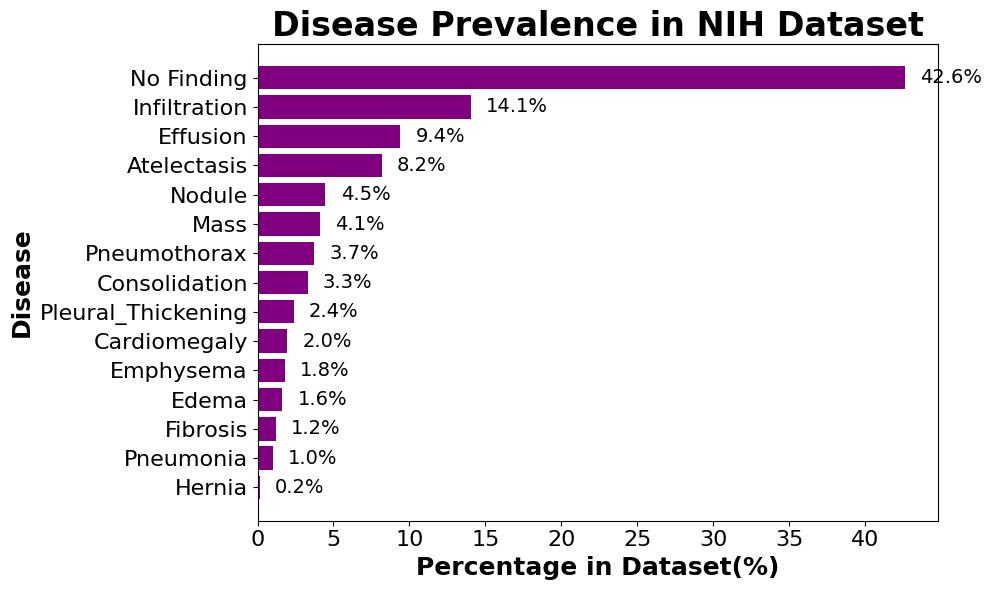

In [29]:
#generate NIH prevalence bar plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

fig,ax = plt.subplots(figsize =(10,6))
#pos_y = np.arange(len(df["Disease"]))
bars = ax.barh(df_plot["Disease"], df_plot["Percentage"], color = "purple")
#formatter = mtick.PercentFormatter(xmax =100)
#ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel("Percentage in Dataset(%)", fontweight = "bold", fontsize = 18)
ax.set_ylabel("Disease" , fontweight = "bold", fontsize = 18)
ax.set_title("Disease Prevalence in NIH Dataset", fontweight = "bold", fontsize = 24)
ax.tick_params(axis = "x", labelsize = 16)
ax.tick_params(axis = "y", labelsize = 16)
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
    f"{width:.1f}%",fontsize = 14,
    va="center", ha="left")
    
plt.tight_layout()
plt.show()
fig.savefig("NIH Imbalance Plot")

In [30]:
#Plot prevalence plot for combined dataset
nih_chexcomb_df = pd.read_csv("./nih_chexcomb_df_final.csv")
nih_comb_dfsub = nih_chexcomb_df.loc[:,target_labels]
nih_comb_dfsub.head()


,No Finding,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
nih_combcolsum = nih_comb_dfsub.sum()
nih_combcolsum

No Finding             82780.0
Atelectasis            78754.0
Cardiomegaly           37931.0
Consolidation          47225.0
Edema                  67578.0
Effusion              111199.0
Emphysema               2516.0
Fibrosis                1686.0
Hernia                   227.0
Infiltration           19894.0
Mass                    5782.0
Nodule                  6331.0
Pleural_Thickening      3385.0
Pneumonia              26248.0
Pneumothorax           27903.0
dtype: float64

In [32]:
df_plot1 = nih_combcolsum.to_frame().reset_index()
df_plot1 = df_plot1.rename(columns = {"index": "Disease", 0 : "Frequency"})
df_plot1["Percentage"]= (df_plot1["Frequency"]/ df_plot1["Frequency"].sum())*100
df_plot1= df_plot1.sort_values(by = "Percentage", ascending = True)
df_plot1

,Disease,Frequency,Percentage
8,Hernia,227.0,0.043701
7,Fibrosis,1686.0,0.324581
6,Emphysema,2516.0,0.484369
12,Pleural_Thickening,3385.0,0.651665
10,Mass,5782.0,1.113124
11,Nodule,6331.0,1.218815
9,Infiltration,19894.0,3.829901
13,Pneumonia,26248.0,5.053144
14,Pneumothorax,27903.0,5.371757
2,Cardiomegaly,37931.0,7.302301


In [33]:
#merge both subset dataframe
df_merged = pd.merge(df_plot, df_plot1, on = "Disease")
#df_merged = df_merged.rename(columns = {"Percentage_x": "NIH", "Percentage_y" : "Combined"})
df_merged

,Disease,Frequency_x,Percentage_x,Frequency_y,Percentage_y
0,Hernia,227,0.160382,227.0,0.043701
1,Pneumonia,1431,1.011043,26248.0,5.053144
2,Fibrosis,1686,1.191208,1686.0,0.324581
3,Edema,2303,1.627136,67578.0,13.009805
4,Emphysema,2516,1.777627,2516.0,0.484369
5,Cardiomegaly,2776,1.961325,37931.0,7.302301
6,Pleural_Thickening,3385,2.391601,3385.0,0.651665
7,Consolidation,4667,3.297371,47225.0,9.091539
8,Pneumothorax,5302,3.746017,27903.0,5.371757
9,Mass,5782,4.085151,5782.0,1.113124


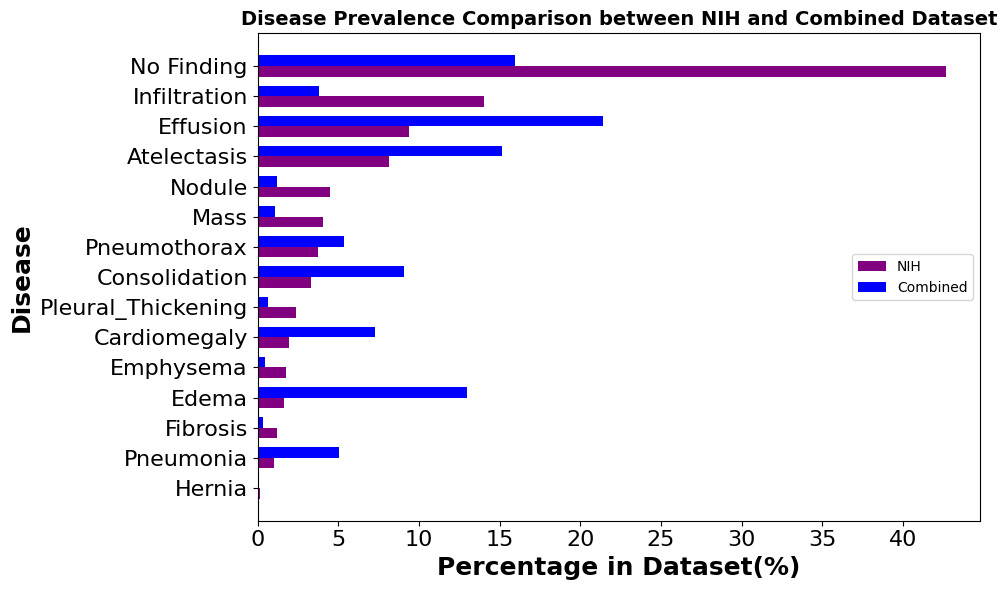

In [34]:
#plot grouped bar plots
pos_y = np.arange(len(df_merged["Disease"]))
bar_height = 0.35

fig, ax = plt.subplots(figsize = (10,6))
ax.barh(pos_y - bar_height/2, df_merged["Percentage_x"], height = bar_height, color = "purple", label = "NIH")
ax.barh(pos_y + bar_height/2, df_merged["Percentage_y"], height = bar_height, color = "blue", label = "Combined")
ax.set_yticks(pos_y)
ax.set_yticklabels(df_merged["Disease"])
ax.set_xlabel("Percentage in Dataset(%)", fontweight = "bold", fontsize = 18)
ax.set_ylabel("Disease", fontweight = "bold", fontsize = 18)
ax.set_title("Disease Prevalence Comparison between NIH and Combined Dataset", fontweight = "bold",fontsize = 14)
ax.tick_params(axis = "x", labelsize = 16)
ax.tick_params(axis = "y", labelsize = 16)
ax.legend(loc = "center right")
plt.tight_layout()
plt.show()
fig.savefig("NIH_Chex Imbalance Plot")